**In this notebook starts the analysis of event detention by hour and by day.**

In [1]:
#importing all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
sensor = pd.read_csv('sensor4.csv')

In [3]:
sensor.drop(['Unnamed: 0','dt'],axis=1, inplace=True)

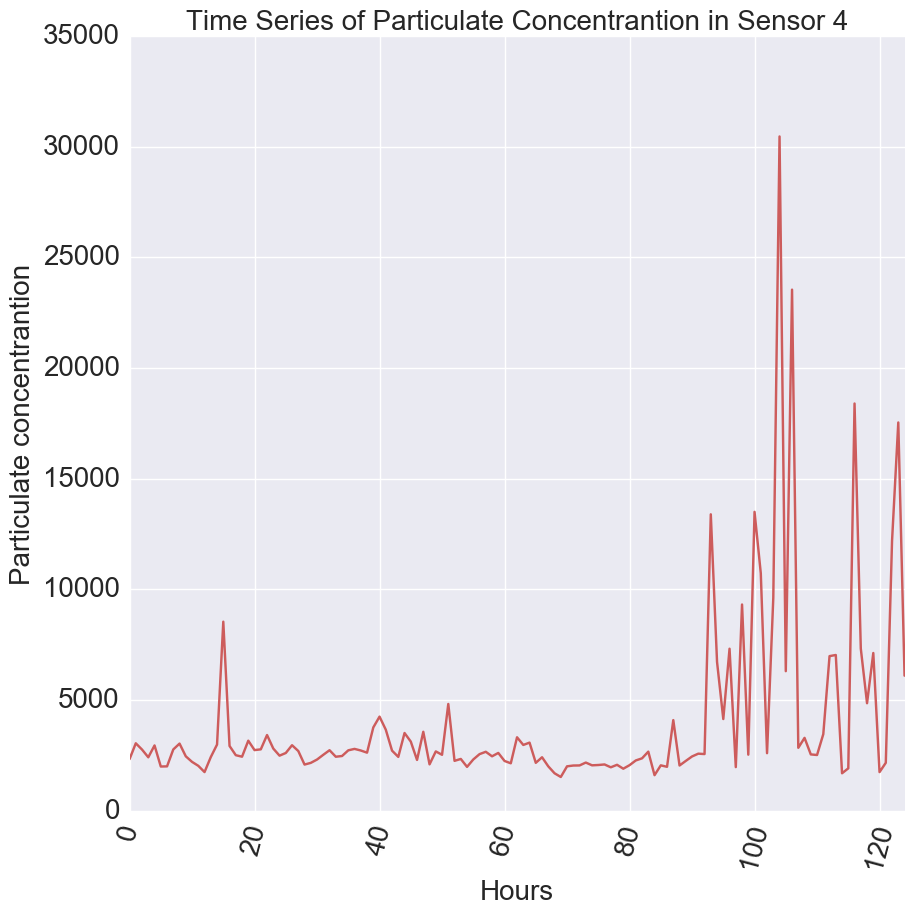

In [4]:
ax = sensor.con.plot(figsize=(10,10), color="IndianRed")
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-20, plt.ylim()[1])
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Particulate concentrantion", fontsize=20)
plt.title('Time Series of Particulate Concentrantion in Sensor 4', fontsize=20)

Fig.19: Time Series of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensor 4 located at Pioneer Works roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231. There is a some spikes to be detected.

In [5]:
#Analysing the threesolds

In [6]:
print ("mean con by hour {:.2f}".format(sensor['con'].mean()))
print ("stdev con by hour {:.2f}".format(sensor['con'].std()))
thresholds = [sensor['con'].mean() + 3 * sensor['con'].std(), 
              sensor['con'].mean() - 3 * sensor['con'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print "earliest datapoint:", min(sensor.date), min(sensor.time)

mean con by hour 3949.71
stdev con by hour 4183.68
3-sigma thresholds 16500.76 -8601.34
earliest datapoint: 2016-06-21 00:00:00


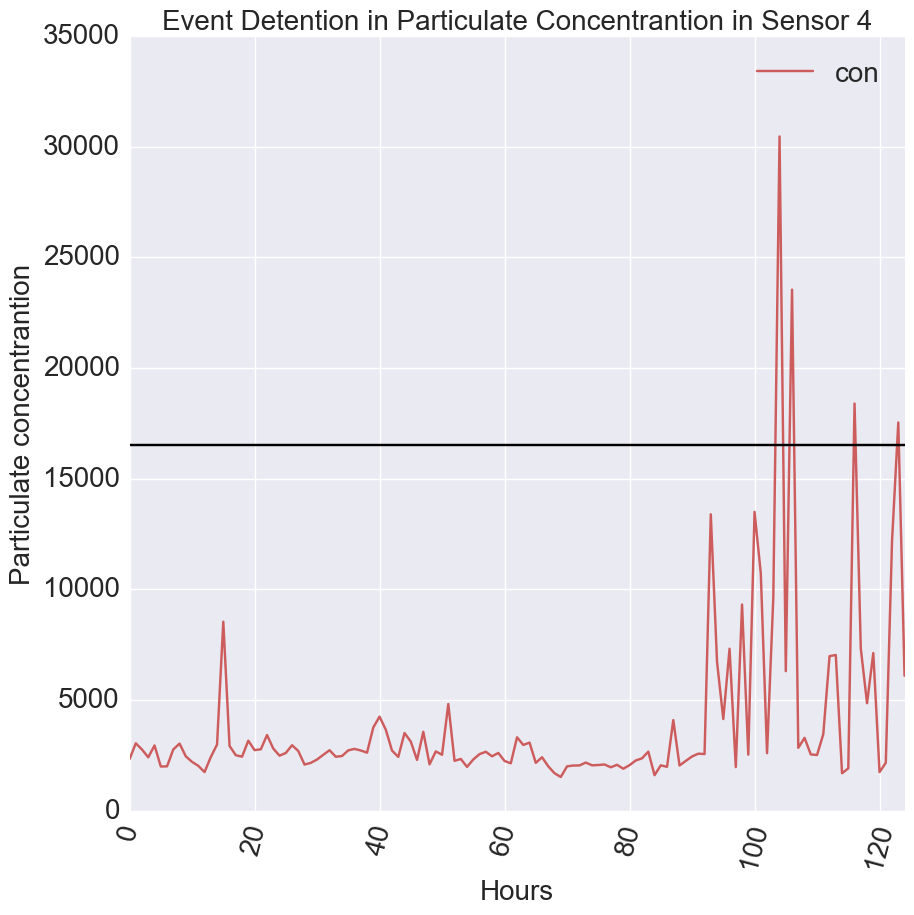

In [7]:
ax = sensor.con.plot(figsize=(10,10), color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k')
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-20, plt.ylim()[1])
plt.legend(loc ='best', fontsize=20)
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Particulate concentrantion", fontsize=20)
plt.title('Event Detention in Particulate Concentrantion in Sensor 4', fontsize=20)

**Fig.20:** Event detention and times series of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensor 4 located at Pioneer Works roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231. It can be seen that there are several spikes that overpass the upper threesold.

In [8]:
print 'The event detected is: '
sensor[(sensor.con > thresholds[0])]

The event detected is: 


,sensor,con,spl,date,time
104,sensor_4,30462.6575,72.394911,2016-07-08,08:00:00
106,sensor_4,23540.7300,80.936906,2016-07-08,16:00:00
116,sensor_4,18395.0950,70.323045,2016-07-10,08:00:00
123,sensor_4,17538.6225,73.268664,2016-07-11,12:00:00


The information of the events is as it can be seen in the previous table. It can be seen that there 2 spikes that correspond to same day: 08/07

The most promint event is 08/07 at 8:00 and the value of the particles concentantration is : 30462.6575 particles per 0.01 cubic feet. Follows by the same day at 4pm with 23540.7300 particles per 0.01 cubic feet.

The next ones are in 10/07 and 11/07 with 18395.0950 and 17538.6225 particles per 0.01 cubic feet.

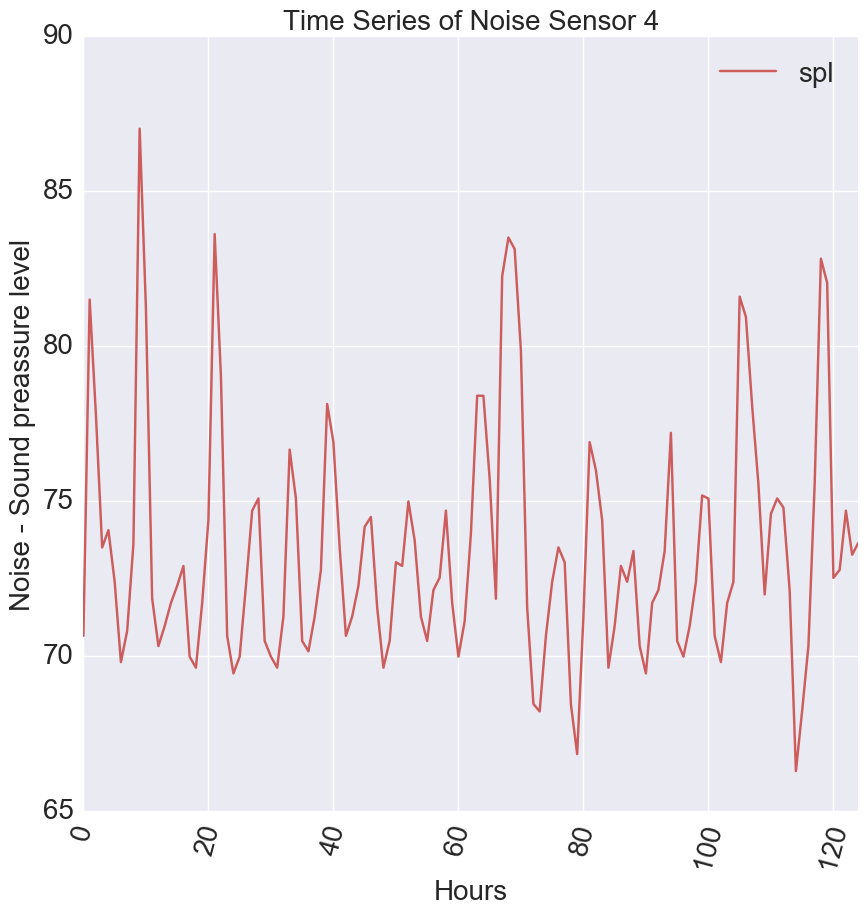

In [9]:
sensor.spl.plot(figsize=(10,10), color="IndianRed")
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Noise - Sound preassure level", fontsize=20)
plt.title('Time Series of Noise Sensor 4', fontsize=20)

**Fig.21:** Time Series of noise (sound pressure level in dB) by hour measured by sensor 4 located at Pioneer Works roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231. It can be seen as very uniform

In [10]:
print ("mean con by hour {:.2f}".format(sensor['spl'].mean()))
print ("stdev con by hour {:.2f}".format(sensor['spl'].std()))
thresholds = [sensor['spl'].mean() + 3 * sensor['spl'].std(), 
              sensor['spl'].mean() - 3 * sensor['spl'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print "earliest datapoint:", min(sensor.date),min(sensor.time)

mean con by hour 73.44
stdev con by hour 3.86
3-sigma thresholds 85.03 61.85
earliest datapoint: 2016-06-21 00:00:00


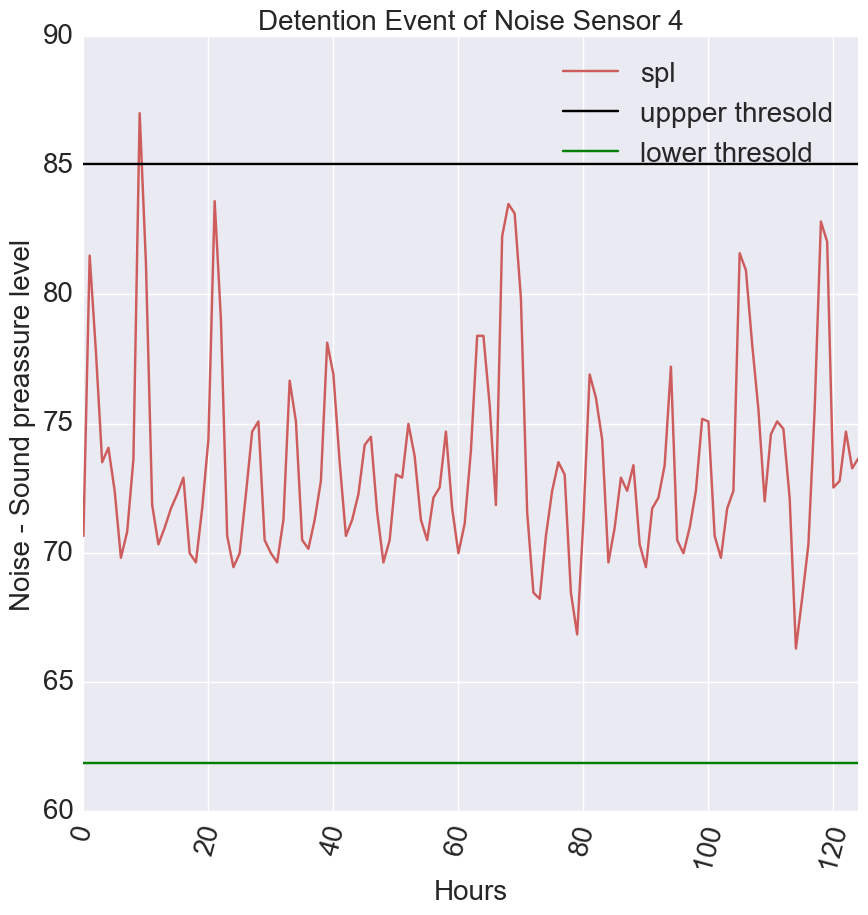

In [11]:
ax = sensor.spl.plot(figsize=(10,10), color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k', label = 'uppper thresold')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]], color='green', label = 'lower thresold')
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc= 'best',fontsize=20)
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Noise - Sound preassure level", fontsize=20)
plt.title('Detention Event of Noise Sensor 4', fontsize=20)

**Fig.22:** Event detention and Time Series  of noise (sound pressure level in dB) by hour measured by sensor 4 located at Pioneer Works roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231. It can be seen as very uniform but it can be seen that there is one value which overpassed the threeshold.

In [12]:
# arithmetic assertation:

In [13]:
sensor.loc[(sensor.spl > thresholds[0])]

,sensor,con,spl,date,time
9,sensor_4,2453.33875,87.013511,2016-06-22,12:00:00


In [14]:
sensor.loc[(sensor.spl < thresholds[1])]

,sensor,con,spl,date,time


It can be seen that there no event that overpass the threesholds.

In [15]:
# grouping by day

In [16]:
sensor_con_date = sensor[['date', 'con']].groupby('date').sum()
sensor_spl_date = sensor[['date', 'spl']].groupby('date').sum()

In [17]:
# Threshold for concentration level

In [18]:
print ("mean con by day {:.2f}".format(sensor_con_date['con'].mean()))
print ("stdev con by day {:.2f}".format(sensor_con_date['con'].std()))
thresholds = [sensor_con_date['con'].mean() + 3 * sensor_con_date['con'].std(), 
              sensor_con_date['con'].mean() - 3 * sensor_con_date['con'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print "earliest datapoint:", min(sensor.date),min(sensor.time)

mean con by day 23510.19
stdev con by day 15561.07
3-sigma thresholds 70193.41 -23173.04
earliest datapoint: 2016-06-21 00:00:00


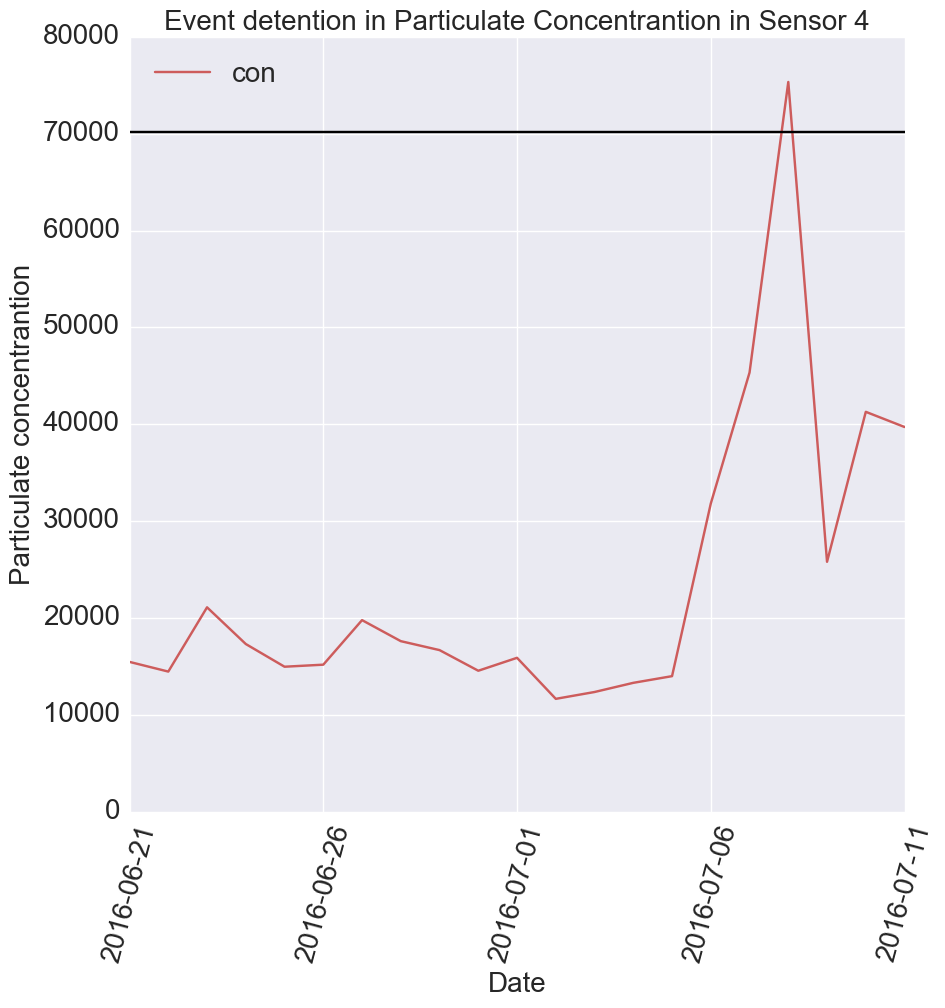

In [19]:
ax = sensor_con_date.plot(figsize=(10,10), color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k')
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-20, plt.ylim()[1])
plt.legend(loc ='best', fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Particulate concentrantion", fontsize=20)
plt.title('Event detention in Particulate Concentrantion in Sensor 4', fontsize=20)

**Fig.23:** Event detention and times series of Particulate Concentrantion (particle count per 0.01 cubic feet) by day measured by sensor 4 located at Pioneer Works roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231. It can be seen that there is one spike which overpass the thresholds.

In [20]:
sensor_con_date.loc[(sensor_con_date.con > thresholds[0])]

,con
date,
2016-07-08,75349.12625


The value is 75349.12625 particles per 0.01 cubic feet.

In [21]:
# Threeshold for noise level

In [22]:
print ("mean con by day {:.2f}".format(sensor_spl_date['spl'].mean()))
print ("stdev con by day {:.2f}".format(sensor_spl_date['spl'].std()))
thresholds = [sensor_spl_date['spl'].mean() + 3 * sensor_spl_date['spl'].std(), 
              sensor_spl_date['spl'].mean() - 3 * sensor_spl_date['spl'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print "earliest datapoint:", min(sensor.date),min(sensor.time)

mean con by day 437.14
stdev con by day 19.58
3-sigma thresholds 495.89 378.39
earliest datapoint: 2016-06-21 00:00:00


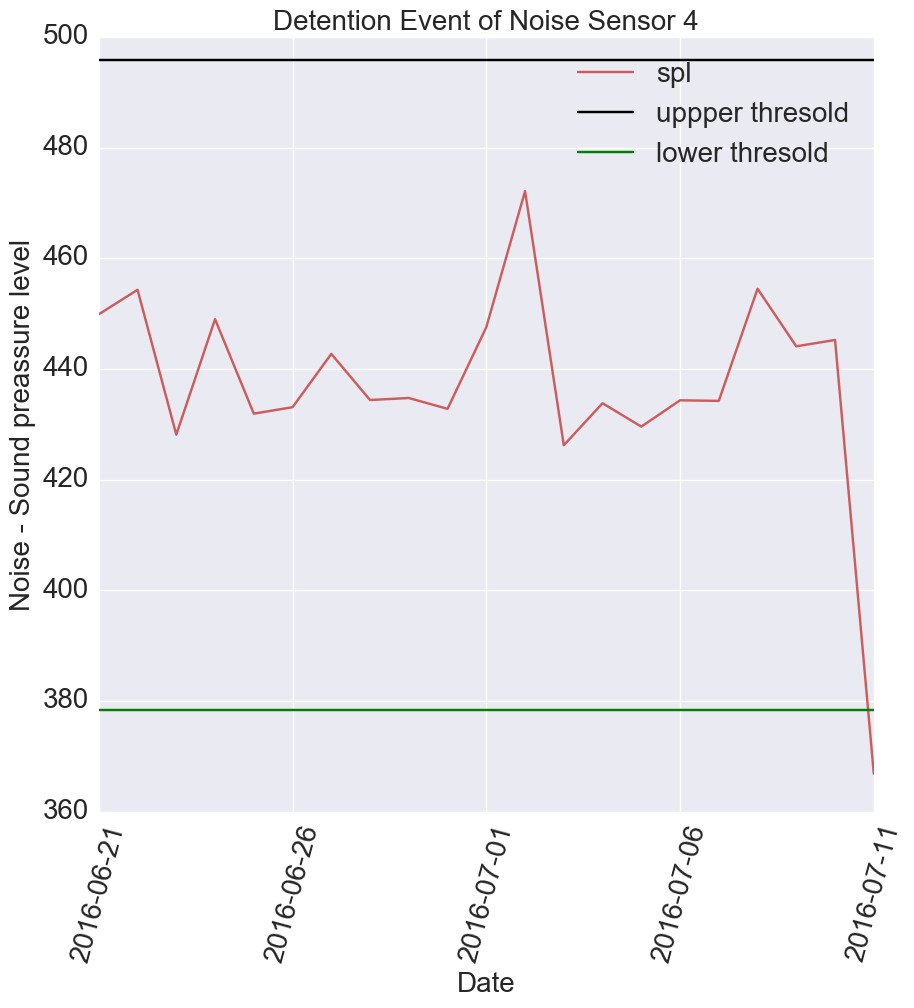

In [23]:
ax = sensor_spl_date.spl.plot(figsize=(10,10), color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k', label = 'uppper thresold')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]], color='green', label = 'lower thresold')
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc= 'best',fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Noise - Sound preassure level", fontsize=20)
plt.title('Detention Event of Noise Sensor 4', fontsize=20)

**Fig.24:** Event detention and Time Series of noise (sound pressure level in dB)  by day measured by sensor 4 located at Pioneer Works roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231. It can be seen that it is uniformly distributed but the drop overpassed the threeshold.

In [24]:
#arithmentic prove

In [25]:
sensor_spl_date.loc[(sensor_spl_date.spl > thresholds[0])]

,spl
date,


In [26]:
sensor_spl_date.loc[(sensor_spl_date.spl < thresholds[1])]

,spl
date,
2016-07-11,366.916708


The drop is the day 11-07 which has a noise level of 366.916708 db